In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image

In [18]:
def png_to_data(out_path, in_path):
    image = Image.open(in_path)
    arr = np.asarray(image)
    print(arr.shape)
    with open(out_path, "wb") as f:
        f.write(arr.shape[0].to_bytes(4, byteorder='little'))
        f.write(arr.shape[1].to_bytes(4, byteorder='little'))
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                f.write(int(arr[i, j, 0]).to_bytes(1, byteorder='little'))
                f.write(int(arr[i, j, 1]).to_bytes(1, byteorder='little'))
                f.write(int(arr[i, j, 2]).to_bytes(1, byteorder='little'))
                f.write(int(0).to_bytes(1, byteorder='little'))

def plot_data(file_path):
    with open(file_path, "rb") as f:
        n = int.from_bytes(f.read(4), byteorder='little')
        m = int.from_bytes(f.read(4), byteorder='little')
        image_data = np.empty((n, m, 4)).astype(int)
        for i in range(n):
            for j in range(m):
                    r = int.from_bytes(f.read(1), byteorder='little')
                    g = int.from_bytes(f.read(1), byteorder='little')
                    b = int.from_bytes(f.read(1), byteorder='little')
                    a = int.from_bytes(f.read(1), byteorder='little')
                    # print('______')
                    image_data[i, j, 0] = r
                    image_data[i, j, 1] = g
                    image_data[i, j, 2] = b
                    image_data[i, j, 3] = 255
        plt.imshow(np.array(image_data))

In [19]:
png_to_data('test_images/2.data', 'test_images/2.png')


(1065, 1065, 3)


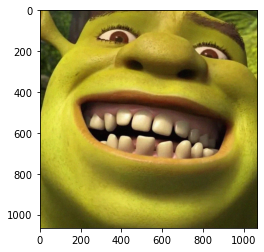

In [20]:
plot_data('test_images/2.data')

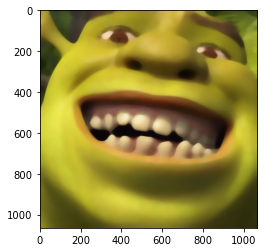

In [25]:
plot_data('out.data')
# plot_data('out.data')